# Tarea 3
- Nombre: **Matías Duhalde**
- Número de alumno: **18639496**


## Imports

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import face_recognition as fr

## Define constants

In [170]:
EMOTIONS = {
    0: 'enojo',
    1: 'asco',
    2: 'miedo',
    3: 'alegría',
    4: 'tristeza',
    5: 'sorpresa',
    6: 'neutral',
}

IMAGE_WIDTH = 48
IMAGE_HEIGHT = 48

## Load dataset

In [171]:
CSV_PATH = 'mini_fer2013.csv'

df = pd.read_csv(CSV_PATH)

## Parte 1

### Helper functions

In [172]:
def string_to_picture_array(string_):
    pixels = [int(x) for x in string_.split(" ")]
    array = np.empty((IMAGE_HEIGHT, IMAGE_WIDTH), dtype='uint8')
    for i in range(IMAGE_HEIGHT):
        for j in range(IMAGE_WIDTH):
            array[i][j] = pixels[i*IMAGE_HEIGHT+j]
    return array

def picture_array_to_fr_image(array):
    return array


### Preprocessing

In [175]:
print(df[['Usage']].value_counts(normalize=True))
print(df[['emotion']].value_counts(normalize=True))

# Pixels to array
df['pixels'] = df['pixels'].apply(string_to_picture_array)

# Emotion to label
df['emotion'] = df['emotion'].apply(lambda x: EMOTIONS[x])

Usage
ToV      0.900641
Test     0.099359
dtype: float64
emotion
3          0.368415
6          0.232284
5          0.122552
0          0.116900
4          0.085140
2          0.067890
1          0.006818
dtype: float64


### Get one sample image per emotion

In [182]:
emotion_sample = []
for emotion in EMOTIONS.values():
    emotion_sample.append(df[df.emotion == emotion].iloc[1])

### Show images

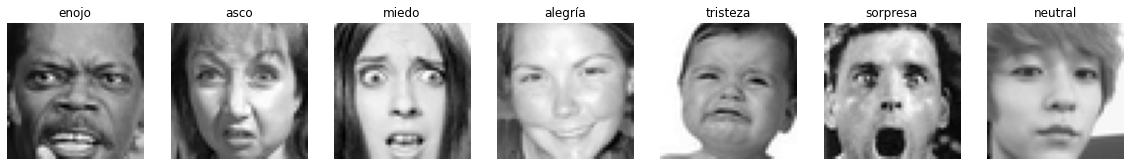

In [251]:
fig, axs = plt.subplots(1, len(EMOTIONS))
fig.set_size_inches((20,4))

for i, row in enumerate(emotion_sample):
    axs[i].imshow(row['pixels'], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(row['emotion'])

### Face recognition (face_landmarks)

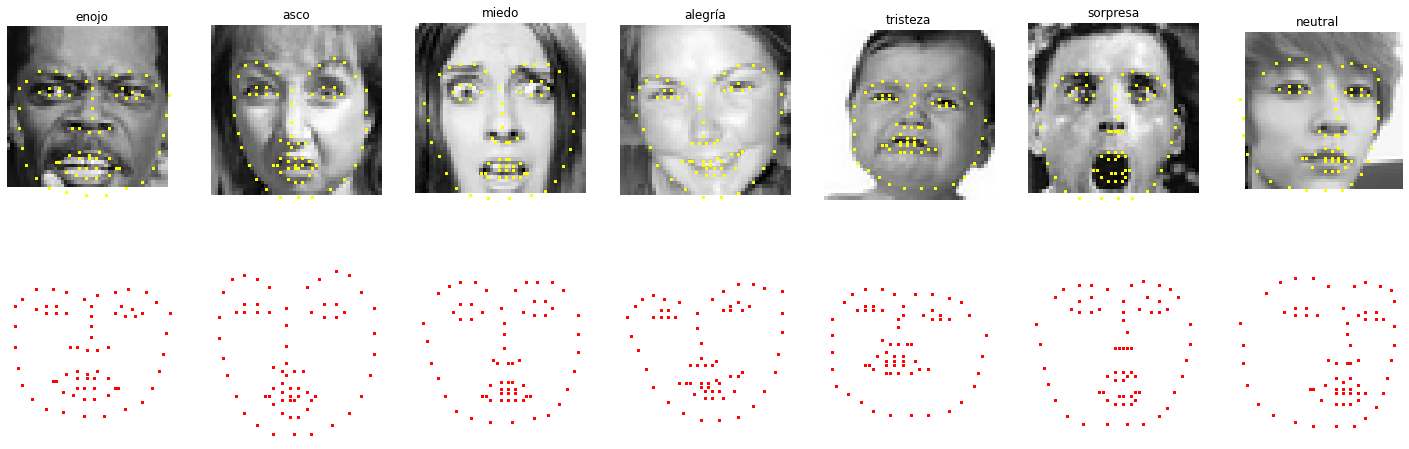

In [252]:
fig, axs = plt.subplots(2, len(EMOTIONS))
fig.set_size_inches((25,8))

for i, row in enumerate(emotion_sample):
    image = row.pixels
    axs[0][i].imshow(row['pixels'], cmap='gray')
    axs[0][i].axis('off')
    axs[0][i].set_title(row['emotion'])
    res = fr.face_landmarks(image)
    if res:
        flatten = [item for sublist in res[0].values() for item in sublist]
        x, y = zip(*flatten)
        axs[0][i].scatter(x, y, 8, 'yellow', marker='s')
        axs[1][i].set_aspect('equal', adjustable='box')
        axs[1][i].axis('off')
        axs[1][i].invert_yaxis()
        axs[1][i].scatter(x, y, 8, 'red', marker='s')


## Parte 2

In [296]:
df['Usage'].value_counts()

test_set = df[df['Usage'] == 'Test'][['emotion', 'pixels']]

train_set, validation_set = np.split(tov_set.sample(frac=1), [int(0.95*len(tov_set))])


### Cantidad de muestras de cada set

In [297]:
print(test_set.head(3))
print(f"Largo set test: {len(test_set)} ({len(test_set)/len(df):.2f}%)")

print(train_set.head(3))
print(f"Largo set train: {len(train_set)} ({len(train_set)/len(df):.2f}%)")

print(validation_set.head(3))
print(f"Largo set train: {len(validation_set)} ({len(validation_set)/len(df):.2f}%)")

        emotion                                             pixels
15455     enojo  [[170, 118, 101, 88, 88, 75, 78, 82, 66, 74, 6...
15456  tristeza  [[72, 66, 66, 69, 62, 51, 57, 60, 56, 66, 63, ...
15457   alegría  [[4, 4, 7, 12, 14, 18, 26, 31, 33, 38, 44, 49,...
Largo set test: 1705 (0.10%)
       emotion                                             pixels
7029  tristeza  [[242, 245, 248, 251, 250, 244, 239, 240, 242,...
752      enojo  [[42, 47, 31, 72, 205, 115, 43, 55, 49, 53, 55...
8008     enojo  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
Largo set train: 14682 (0.86%)
        emotion                                             pixels
14275     enojo  [[224, 224, 225, 226, 226, 227, 229, 211, 146,...
2104   sorpresa  [[40, 40, 39, 39, 40, 41, 42, 43, 41, 49, 70, ...
2774    alegría  [[128, 168, 162, 159, 172, 159, 106, 143, 104,...
Largo set train: 773 (0.05%)


### Ejemplos de cada clase por cada set

In [305]:
print("Clases set test")
print(test_set['emotion'].value_counts())

print("Clases set validation")
print(validation_set['emotion'].value_counts())

print("Clases set train")
print(train_set['emotion'].value_counts())

Clases set test
alegría     624
neutral     413
sorpresa    215
enojo       184
miedo       132
tristeza    126
asco         11
Name: emotion, dtype: int64
Clases set validation
alegría     281
neutral     156
enojo       117
sorpresa     92
tristeza     61
miedo        55
asco         11
Name: emotion, dtype: int64
Clases set train
alegría     5417
neutral     3417
sorpresa    1796
enojo       1705
tristeza    1274
miedo        978
asco          95
Name: emotion, dtype: int64


### Matrices de características y vectores

In [323]:
test_X = np.array(test_set['pixels'].apply(np.ndarray.flatten))
test_Y = np.array(test_set['emotion'])

train_X = np.array(train_set['pixels'].apply(np.ndarray.flatten))
train_Y = np.array(train_set['emotion'])

validation_X = np.array(validation_set['pixels'].apply(np.ndarray.flatten))
validation_Y = np.array(validation_set['emotion'])


### ¿Cuánto es el máximo de características que puede incluir en cada matriz X?


El máximo de características que se podría añadir es una por cada pixel de la imagen, es decir, $48 \times 48 = 2304$

## Parte 3

## Parte 4